In [1]:
%matplotlib inline
%load_ext autoreload
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io
import datetime
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
import loader
import neuralnet
%aimport neuralnet
%aimport loader
%aimport

Modules to reload:
loader neuralnet

Modules to skip:



In [3]:
import loader

In [4]:
def squared_error(y, y_hat):
    return (y - y_hat).dot((y - y_hat))

def squared_error_prime(y, y_hat):
    return -1 * (y - y_hat)

def cross_ent(y, y_hat):
    part1 = y.dot(np.log(y_hat))
    part2 = (1.0 - y).dot(np.nan_to_num(np.log(1.0 - y_hat)))
    return -(part1 + part2)

def cross_ent_prime(y, y_hat):
    part1 = y / y_hat
    part2 = (1 - y)/(1 - y_hat)
    return -(part1 - part2)
    
def t(z):
    return np.tanh(z)

def t_prime(z):
    return 1 - np.power(t(z), 2)

def g(z):
    return (1.0 / (1.0 + np.exp(-z)))

def g_prime(z):
    return g(z) * (1 - g(z))

In [5]:
%autoreload
xy = loader.XY18()

training w2v
starting X
starting X test
starting TFIDF
now just transforming
DONE!


In [6]:
X1 = xy['X_train']
y1 = xy['y_train']
y = pd.get_dummies(y1).values
XVal1 = xy['X_val']
yVal = xy['y_val']
yVal = pd.get_dummies(yVal).values

In [7]:
X = X1.toarray()
XVal = XVal1.toarray()
from sklearn.preprocessing import normalize
X = normalize(X)
XVal = normalize(XVal)

Total Train Time 345.25 Seconds
Parameters used {'eta': 0.01, 'end': datetime.datetime(2015, 12, 10, 20, 48, 13, 522052), 'num_iters': 300000, 'start': datetime.datetime(2015, 12, 10, 20, 42, 28, 271419), 'score_every': 100000}
Training Accuracy 0.582226054691
Validation Accuracy 0.569689051476


/Users/bill_chambers/AeroFS/Dev/mlproject/walmart/neuralnet.py:120: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if XVal != None:


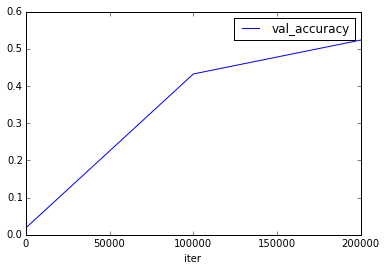

In [100]:
%autoreload
input_dim = len(X[0])
output_dim = len(y[0])
hl_size = 150

layer1 = neuralnet.Layer((input_dim, hl_size), t, t_prime)
layer2 = neuralnet.OutputLayer((hl_size, output_dim), g, g_prime)
nn = neuralnet.NeuralNet(layer1, layer2, cross_ent, cross_ent_prime)
nn.train(X, y, num_iters=300000, score_every=100000, eta=0.01, XVal=XVal, yVal=yVal)
print("Parameters used", nn.train_params)
nn.resulting_scores()[['val_accuracy', 'iter']].plot(x='iter')
print("Training Accuracy", nn.score(X,y)/len(X))
print("Validation Accuracy", nn.score(XVal,yVal)/len(XVal))

In [101]:
nn.cache_layers("layers.pkl")

Total Train Time 692.94 Seconds
Parameters used {'eta': 0.01, 'end': datetime.datetime(2015, 12, 10, 20, 59, 50, 703068), 'num_iters': 500000, 'start': datetime.datetime(2015, 12, 10, 20, 48, 17, 760492), 'score_every': 100000}
Training Accuracy 0.623094108886
Validation Accuracy 0.611758557617


/Users/bill_chambers/AeroFS/Dev/mlproject/walmart/neuralnet.py:120: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if XVal != None:


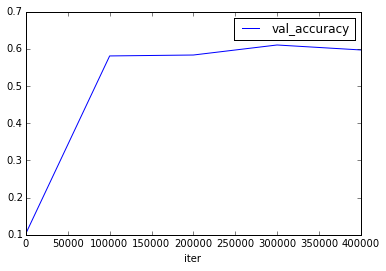

In [102]:
layer1 = neuralnet.Layer((input_dim, hl_size), t, t_prime)
layer2 = neuralnet.OutputLayer((hl_size, output_dim), g, g_prime)
nn = neuralnet.NeuralNet(layer1, layer2, cross_ent, cross_ent_prime)
nn.load_layers('layers.pkl')
nn.train(X, y, num_iters=500000, score_every=100000, eta=0.01, XVal=XVal, yVal=yVal)
print("Parameters used", nn.train_params)
nn.resulting_scores()[['val_accuracy', 'iter']].plot(x='iter')
print("Training Accuracy", nn.score(X,y)/len(X))
print("Validation Accuracy", nn.score(XVal,yVal)/len(XVal))

In [103]:
nn.cache_layers("layers.pkl")

Total Train Time 5800.82 Seconds
Parameters used {'eta': 0.005, 'end': datetime.datetime(2015, 12, 10, 23, 26, 31, 487023), 'num_iters': 6000000, 'start': datetime.datetime(2015, 12, 10, 21, 49, 50, 671218), 'score_every': 250000}
Training Accuracy 0.698467447968
Validation Accuracy 0.680324013588


/Users/bill_chambers/AeroFS/Dev/mlproject/walmart/neuralnet.py:120: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if XVal != None:


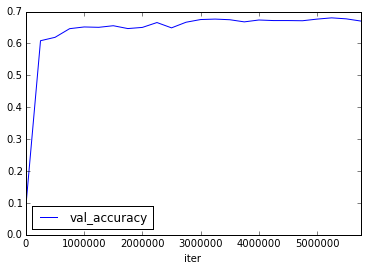

In [105]:
layer1 = neuralnet.Layer((input_dim, hl_size), t, t_prime)
layer2 = neuralnet.OutputLayer((hl_size, output_dim), g, g_prime)
nn = neuralnet.NeuralNet(layer1, layer2, cross_ent, cross_ent_prime)
nn.load_layers('layers.pkl')
nn.train(X, y, num_iters=6000000, score_every=250000, eta=0.005, XVal=XVal, yVal=yVal)
print("Parameters used", nn.train_params)
nn.resulting_scores()[['val_accuracy', 'iter']].plot(x='iter')
print("Training Accuracy", nn.score(X,y)/len(X))
print("Validation Accuracy", nn.score(XVal,yVal)/len(XVal))

In [106]:
nn.cache_layers("layers.pkl")

Total Train Time 4231.50 Seconds
Parameters used {'eta': 0.001, 'score_every': 250000, 'start': datetime.datetime(2015, 12, 11, 7, 30, 38, 508698), 'num_iters': 3000000, 'end': datetime.datetime(2015, 12, 11, 8, 41, 10, 8617)}
Training Accuracy 0.654450672206
Validation Accuracy 0.314659001829


/Users/bill_chambers/AeroFS/Dev/mlproject/walmart/neuralnet.py:120: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if XVal != None:


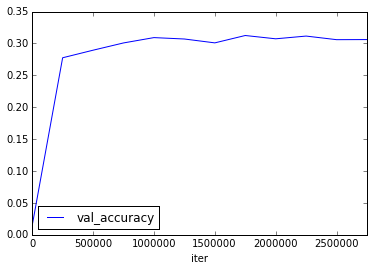

In [9]:
%autoreload
input_dim = len(X[0])
output_dim = len(y[0])
hl_size = 150
layer1 = neuralnet.Layer((input_dim, hl_size), t, t_prime)
layer2 = neuralnet.OutputLayer((hl_size, output_dim), g, g_prime)
nn = neuralnet.NeuralNet(layer1, layer2, cross_ent, cross_ent_prime)
nn.load_layers('layers.pkl')
nn.train(X, y, num_iters=3000000, score_every=250000, eta=0.001, XVal=XVal, yVal=yVal)
print("Parameters used", nn.train_params)
nn.resulting_scores()[['val_accuracy', 'iter']].plot(x='iter')
print("Training Accuracy", nn.score(X,y)/len(X))
print("Validation Accuracy", nn.score(XVal,yVal)/len(XVal))

In [10]:
nn = neuralnet.NeuralNet(layer1, layer2, cross_ent, cross_ent_prime)
nn.load_layers('layers2.pkl')

In [11]:
import utils
preds = pd.Series(nn.predict(normalize(xy['X_test'].toarray()))).map(dict(enumerate(pd.get_dummies(y1).columns)))
utils.convert_predictions(pd.DataFrame({
        "VisitNumber":xy['X_test_index'],
        "TripType": preds
        })).to_csv("XY18.csv", index=False)

Missing Categories {33, 4, 37, 39, 9, 43, 14, 18, 19, 21, 22, 23, 29, 30}
